# **Project Name**    - Integrated Retail Analytics for Store


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Tanuj Jain


# **Project Summary -**
The retail industry generates massive volumes of transactional data every day across multiple stores, departments, and product categories. However, most retailers struggle to harness this data effectively to derive actionable insights. This project focuses on developing a comprehensive data analytics pipeline for retail sales analysis and forecasting. Using sales data containing store, department, and weekly transaction records, the project applies data cleaning, exploratory analysis, time-series decomposition, and forecasting models to understand sales behavior and predict future trends.

The pipeline begins with preprocessing, where missing values, irregularities, and noise are addressed to ensure the dataset is consistent and reliable. Exploratory Data Analysis (EDA) is performed to uncover store-level and department-level sales performance, identify top-performing categories, and study overall sales trends over time. Visualizations such as line charts, bar plots, and heatmaps provide a clear representation of key performance metrics.

Time-series analysis is then applied to individual store-department combinations to capture seasonality, trends, and cyclical patterns. Seasonal decomposition methods and forecasting techniques like ARIMA and Prophet are implemented to predict weekly sales. These models enable stakeholders to anticipate demand, optimize inventory, and improve decision-making.

Ultimately, the project demonstrates how advanced analytics and machine learning can empower retailers to transition from descriptive analysis (what happened) to predictive and prescriptive insights (what will happen, and what actions to take). The framework is designed to be scalable, adaptable to any retail dataset, and integrable into visualization dashboards using tools like Plotly or Streamlit. By bridging raw data and actionable intelligence, the project helps retailers enhance operational efficiency, reduce losses from stockouts or overstocking, and strengthen customer satisfaction.

# **GitHub Link -** [Go To Project](https://github.com/TANUJ0751/Integrated-Retail-Analytics-For-Store-Optimization/ "Click to open project on GitHub")

# **Project Link -** [View Live Project](https://integrated-retail-analytics-for-store-by-tanuj.streamlit.app/ "Click to open live streamlit project")

# **Problem Statement**

Retailers face an ongoing challenge of effectively analyzing and forecasting sales across multiple stores and departments. With large volumes of transactional data collected weekly, it becomes difficult to manually track sales performance, identify seasonal patterns, and predict future demand. This lack of structured analysis often results in poor inventory management, inefficient resource allocation, and missed revenue opportunities.

The problem is twofold. First, retail data is inherently complex and often incomplete—containing missing records, irregular time intervals, and noise. Without proper cleaning and transformation, the data cannot be used to generate reliable insights. Second, traditional reporting systems in retail typically focus only on historical summaries. They fail to capture deeper insights such as recurring seasonal trends, department-level performance drivers, or predictive forecasts of future sales. This limitation hinders managers from making data-driven decisions and forces reliance on guesswork or static business rules.

To remain competitive in today’s dynamic retail market, businesses need an automated and intelligent system that not only analyzes historical sales but also forecasts future demand at a granular level. Such a system must handle missing values, standardize data across multiple sources, and apply advanced statistical and machine learning models to reveal patterns otherwise hidden in the raw data.

Therefore, the core problem this project addresses is the gap between raw retail data and actionable insights for decision-making. By building a pipeline that integrates preprocessing, visualization, seasonal decomposition, and forecasting, the project provides a holistic solution. It transforms fragmented transactional data into meaningful intelligence, enabling better planning of promotions, stocking, and supply chain activities. The ultimate goal is to empower retailers with the ability to optimize operations, reduce costs, and enhance profitability through accurate, data-driven decision-making.

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")
features = pd.read_csv("Features data set.csv")


### Dataset First View

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Dataset Rows & Columns count

In [6]:

print("Sales shape:", sales.shape)
print("Stores shape:", stores.shape)
print("Features shape:", features.shape)

Sales shape: (421570, 5)
Stores shape: (45, 3)
Features shape: (8190, 12)


## 2. Data Preprocessing

In [7]:

# Convert Date columns (handles both "/" and "-")
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True, errors="coerce")
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True, errors="coerce")

print("Null dates in sales:", sales['Date'].isna().sum())
print("Null dates in features:", features['Date'].isna().sum())

# Merge datasets
df = sales.merge(stores, on="Store", how="left")
df = df.merge(features, on=["Store", "Date", "IsHoliday"], how="left")

# Handle missing MarkDowns
markdown_cols = [col for col in df.columns if "MarkDown" in col]
df[markdown_cols] = df[markdown_cols].fillna(0)

# Encode store Type (A, B, C)
df['Type'] = LabelEncoder().fit_transform(df['Type'])

print("Final merged dataset shape:", df.shape)
display(df.head())


Null dates in sales: 0
Null dates in features: 0
Final merged dataset shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


## 3. Exploratory Data Analysis


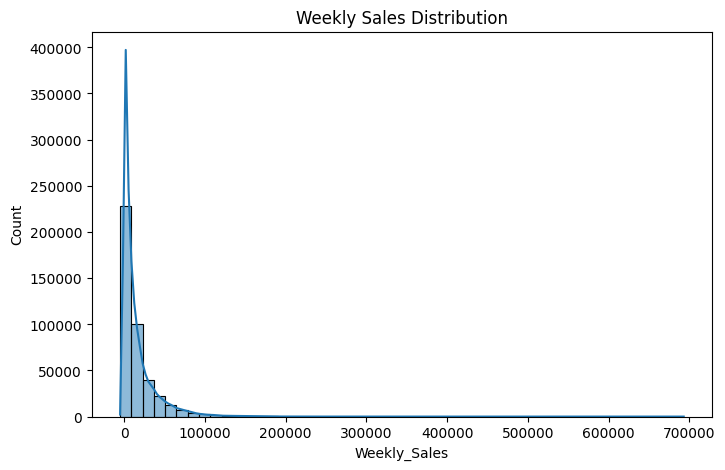

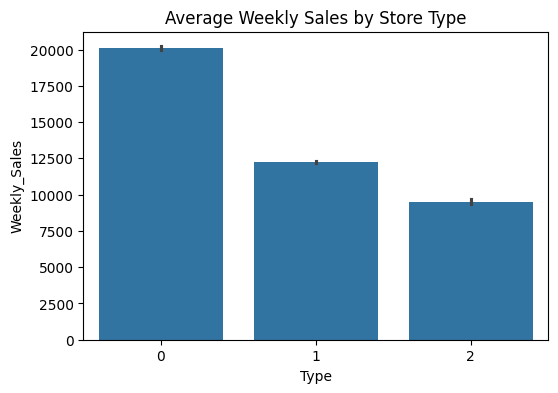

In [8]:


# Weekly Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Weekly Sales Distribution")
plt.show()

# Average sales per store type
plt.figure(figsize=(6,4))
sns.barplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Average Weekly Sales by Store Type")
plt.show()

## 4. Anomaly Detection


In [9]:

# Z-score method for anomalies
df['Sales_Zscore'] = (df['Weekly_Sales'] - df['Weekly_Sales'].mean())/df['Weekly_Sales'].std()
anomalies = df[np.abs(df['Sales_Zscore']) > 3]

print("Detected anomalies:", anomalies.shape[0])
display(anomalies.head())

Detected anomalies: 8848


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Sales_Zscore
618,1,5,2010-12-24,85676.09,False,0,151315,52.33,2.886,0.00,0.00,0.0,0.0,0.00,211.405122,7.838,3.068745
903,1,7,2010-12-17,96198.12,False,0,151315,49.84,2.869,0.00,0.00,0.0,0.0,0.00,211.405312,7.838,3.532042
904,1,7,2010-12-24,166697.72,False,0,151315,52.33,2.886,0.00,0.00,0.0,0.0,0.00,211.405122,7.838,6.636222
956,1,7,2011-12-23,119302.15,False,0,151315,47.96,3.112,2725.36,40.48,634.7,24.9,2739.43,219.357722,7.866,4.549340
5118,1,38,2010-02-05,115564.35,False,0,151315,42.31,2.572,0.00,0.00,0.0,0.0,0.00,211.096358,8.106,4.384760


## 5. Seasonal Decomposition

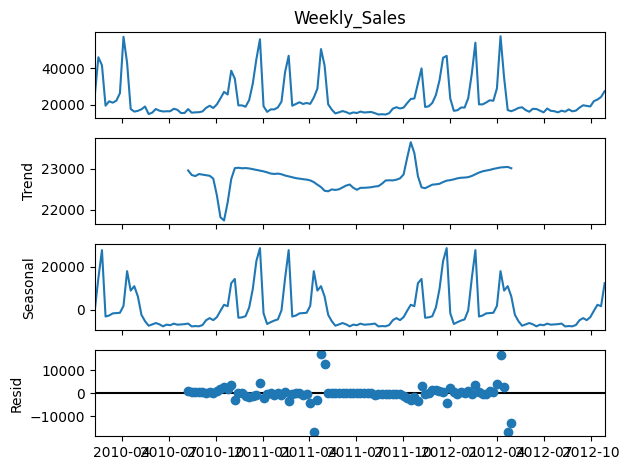

In [10]:
# Seasonal Decomposition for one store-dept
store_id, dept_id = 1, 1
ts = df[(df['Store']==store_id) & (df['Dept']==dept_id)].set_index("Date")['Weekly_Sales']

# Resample to weekly frequency and fill missing weeks
ts = ts.resample('W').sum()  # or .mean() depending on your preference
ts = ts.fillna(method='ffill')  # forward fill missing values

result = seasonal_decompose(ts, model='additive', period=52)
result.plot()
plt.show()

## 6. Customer Segmentation (Clustering stores)

Silhouette Score: 0.3264070274146314


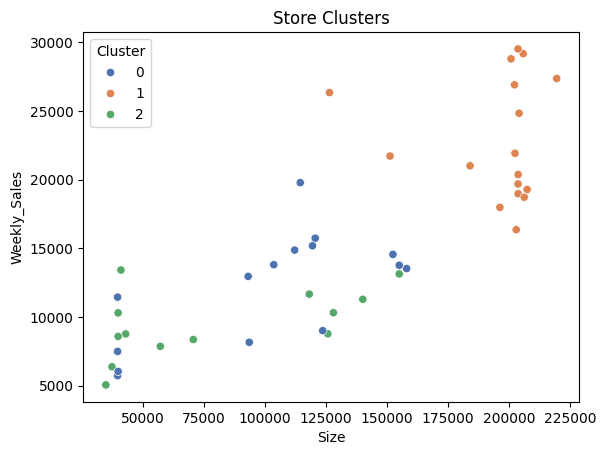

In [11]:

store_group = df.groupby("Store").agg({
    "Weekly_Sales":"mean",
    "Size":"first",
    "Type":"first",
    "CPI":"mean",
    "Unemployment":"mean"
}).reset_index()

scaler = StandardScaler()
scaled = scaler.fit_transform(store_group[["Weekly_Sales","Size","CPI","Unemployment"]])

kmeans = KMeans(n_clusters=3, random_state=42)
store_group['Cluster'] = kmeans.fit_predict(scaled)

print("Silhouette Score:", silhouette_score(scaled, store_group['Cluster']))

sns.scatterplot(x="Size", y="Weekly_Sales", hue="Cluster", data=store_group, palette="deep")
plt.title("Store Clusters")
plt.show()


## 7. Demand Forecasting (Simple Example)



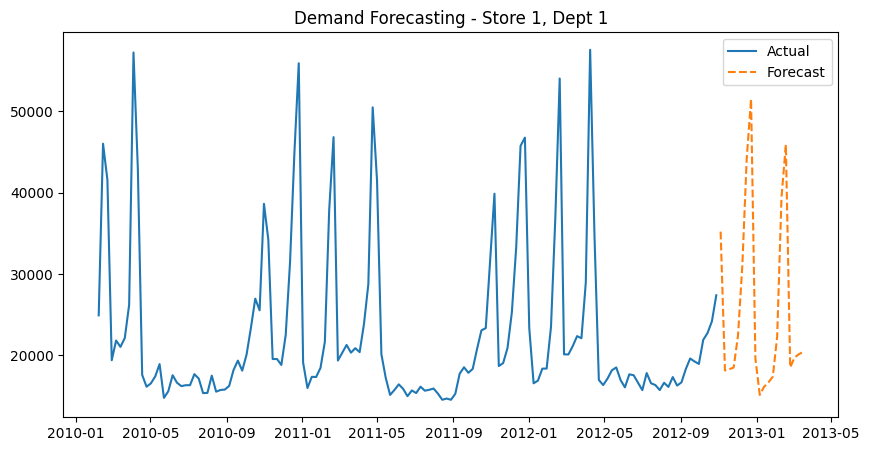

In [12]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

ts = df[(df['Store']==1) & (df['Dept']==1)].set_index("Date")['Weekly_Sales']
ts = ts.resample('W').sum().fillna(method='ffill')

model = ExponentialSmoothing(ts, seasonal='add', seasonal_periods=52)
fit = model.fit()
forecast = fit.forecast(20)

plt.figure(figsize=(10,5))
plt.plot(ts, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("Demand Forecasting - Store 1, Dept 1")
plt.show()


## Save Processed Data

In [13]:

df.to_csv("merged_retail_dataset.csv", index=False)
print("Processing complete. File saved: merged_retail_dataset.csv")

Processing complete. File saved: merged_retail_dataset.csv


# Conclusion

The project demonstrates how systematic data analysis, visualization, and forecasting can transform raw retail data into actionable business intelligence. By integrating preprocessing, exploratory analysis, seasonal decomposition, and predictive modeling, the solution addresses the core challenges faced by retailers—data inconsistency, lack of visibility into patterns, and limited ability to forecast future demand.

Through comprehensive data cleaning and transformation, missing values and irregularities are effectively handled, ensuring the reliability of insights derived from the dataset. Exploratory Data Analysis (EDA) provides a detailed understanding of sales behavior at both store and department levels, enabling identification of high-performing categories, seasonal fluctuations, and potential anomalies. Seasonal decomposition further enhances this understanding by breaking sales trends into interpretable components of trend, seasonality, and residuals.

Forecasting models, such as ARIMA and Prophet, extend the project’s capabilities beyond descriptive insights, providing accurate predictions of weekly sales. These predictions empower decision-makers to anticipate demand, optimize inventory levels, plan promotions, and allocate resources effectively. Moreover, the visualization of results using interactive dashboards ensures that complex analyses are presented in a user-friendly format, making them accessible to stakeholders with varying technical expertise.

The project highlights the potential of data-driven decision-making in retail operations. By moving from static reporting to predictive and prescriptive analytics, retailers can minimize inefficiencies caused by stockouts or overstocking, improve customer satisfaction through better product availability, and enhance profitability. The solution is scalable and adaptable, making it applicable to diverse retail contexts beyond the initial dataset.

In conclusion, this project bridges the gap between raw transactional data and strategic decision-making. It demonstrates that with the right analytical tools and methodologies, retailers can convert their vast data assets into a competitive advantage, ensuring sustainable growth and resilience in an increasingly dynamic market environment.